In [262]:
import numpy as np
import matplotlib.pyplot as plt

In [263]:
from loaders import clean_text_for_pattern_letter
from temp_text import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
500
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [264]:
def predict_train(input_str: str | list, prev_n: int = 20):
    StatsDict: dict[str, dict] = {}

    for inp_idx, inp_ltr in enumerate(input_str):
        # if inp_idx == 0:
        #     continue
        
        for rev_idx in range(prev_n):
            prev_idx = inp_idx - rev_idx - 1

            if prev_idx < 0:
                break

            prev_ltr = input_str[prev_idx]
            
            prev_stats = StatsDict.setdefault(prev_ltr, {})
            stats = prev_stats.setdefault(rev_idx, {})
            stats.setdefault(inp_ltr, 0)
            
            stats[inp_ltr] += 1
    
    return StatsDict

In [265]:
# predict train

prev_n_L1 = 20

StatsDict_L1 = predict_train(input_str=input_str, prev_n=prev_n_L1)

In [266]:
for sdk, sdv in StatsDict_L1.items():
    print(sdk)
    for sd_k, sd_v in sdv.items():
        print(sd_k, sd_v)
    print('')

t
0 {'h': 11, ' ': 3, 'e': 3, 'u': 1, 'o': 2, "'": 2, '.': 1, 's': 1, 'r': 1, 'w': 1, 'z': 1, 'i': 1}
1 {'e': 9, 'w': 2, 'l': 2, 'n': 3, ' ': 3, 's': 3, 'r': 1, 'i': 2, 'u': 1, 'o': 1, 'c': 1}
2 {' ': 12, 'a': 4, 'e': 2, 'i': 1, 'o': 2, '"': 1, 's': 1, 'b': 1, 'r': 1, 'w': 1, 'd': 1, 't': 1}
3 {'s': 3, 'p': 1, 'c': 4, 'v': 1, 'd': 2, ' ': 2, 'n': 1, 'k': 1, 'u': 2, 'i': 3, 'l': 1, 'o': 1, 't': 1, 'y': 1, 'e': 1, 'w': 1, 'a': 2}
4 {'k': 1, 'o': 6, ' ': 5, 'i': 2, 'd': 1, 'e': 2, 'g': 1, 'r': 2, 'h': 2, 't': 1, 'm': 1, 's': 2, 'n': 1, 'c': 1}
5 {'y': 1, 'r': 2, 't': 3, 'l': 2, 's': 2, 'e': 1, ' ': 3, 'h': 1, 'o': 2, 'a': 4, "'": 1, 'k': 1, 'w': 1, 'u': 1, 'f': 1, 'g': 1, 'm': 1}
6 {' ': 8, 't': 4, 'h': 1, 'o': 3, 'i': 2, 'a': 3, 'w': 1, 'r': 1, 's': 2, 'e': 1, 'd': 1, 'y': 1}
7 {'a': 1, ' ': 6, 'e': 2, 'r': 3, 'o': 1, 'd': 2, 'l': 1, "'": 1, 't': 1, '.': 1, 's': 5, 'y': 1, 'c': 1, 'b': 1, 'j': 1}
8 {'b': 1, 'w': 1, ' ': 8, 'n': 2, 'a': 3, 'i': 2, 'm': 3, 'h': 1, 'o': 3, 'l': 1, 'p': 1, '

In [267]:
import copy

def predict(input_str: str | list, StatsDict: dict, letters:list, prev_n: int):
    TF = []
    err = 0

    output = []

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            break

        stats = []

        for rev_idx in range(prev_n):
            let_idx = inp_idx - rev_idx
            if let_idx < 0:
                break
            # print(inp_idx, let_idx, rev_idx)
            st = copy.deepcopy(StatsDict[input_str[let_idx]].get(rev_idx, {}))
            stats.append(st)
        # print(inp)
        for st in stats:
            st_sum = sum(st.values())

            for key, val in st.items():
                st[key] = val / st_sum

            # print(input_str[inp_idx + 1], max(st, key=st.get), st)
            
        letter_stats = {}
        for letter in letters:
            letter_stats.setdefault(letter, 0)

            for st in stats:
                st_let = st.get(letter, 0)

                if st_let == 0:
                    letter_stats[letter] = 0
                    break

                letter_stats[letter] += st_let

        max_key = max(letter_stats, key=letter_stats.get)
        # TF.append(sum(letter_stats.values()))
        # TF.append(letter_stats[max_key])

        ls_arr = np.array(list(letter_stats.values()))
        tf = np.sum(ls_arr > 0)
        
        TF.append(tf)
        
        if inp_idx + 1 < len(input_str):
            print(input_str[inp_idx + 1], max_key, letter_stats[max_key], tf)

            if input_str[inp_idx + 1] != max_key:
                err += 1
        else:
            print('>', max_key, letter_stats[max_key], tf)
        print()

        output.append(max_key)

    return TF, err, output

In [268]:
# predict L1

TF, err, out_L1 = predict(input_str=input_str, StatsDict=StatsDict_L1, prev_n=prev_n_L1, letters=letters)

print(err, err / (len(input_str) / 100) )

h h 0.39285714285714285 12

e e 0.9123376623376624 5

    1.1993644653219122 6

s c 0.5120226622424962 7

k   0.9314233956156833 6

y   0.8260123073421841 2

    1.8665828317324604 1

a a 0.9694323121762175 1

b   1.9492609139988466 2

o o 1.3692957771156393 1

v   2.080412118387834 2

e e 2.562024074954484 1

    2.806957125335489 1

t t 1.3313172348920288 1

h h 2.0195073732407587 1

e e 3.08837544351257 2

    4.0818016888878885 1

p p 1.3513024301463408 1

o o 2.2795705890732783 1

r r 2.154760651933994 1

t t 1.8897492314437088 1

    4.203903631397795 1

w w 1.980098323287047 1

a a 2.8250955025219997 1

s s 2.4645863200499947 1

    4.9171588175501375 1

t t 2.1413177662600416 1

h h 2.184143302177233 1

e e 2.9830207050642303 1

    5.256560406705122 1

c c 1.5845310118882483 1

o   3.5403472887872005 2

l l 1.3835266362491945 1

o o 2.2691619516112818 1

r   3.5063418188839686 2

    4.875326814103286 1

o o 1.7194451203751118 1

f f 1.1929299246149043 1

    4.564080891236626

In [269]:
# peak clusters
KF = []

peaks = {}
second_layer_K: dict[int, dict] = {}

max_buffer_K = 3
buffer_K = []

symbol_K = {}
for k_idx in range(prev_n_L1):
    symbol_K.setdefault(k_idx, {})

    for letter in letters:
        symbol_K[k_idx].setdefault(letter, 0)

prev_K = {}
for k_idx in range(prev_n_L1):
    prev_K.setdefault(k_idx, {})

    for letter in letters:
        prev_K[k_idx].setdefault(letter, 0)

for inp_idx, inp in enumerate(input_str):

    # get K
    for k_idx in range(prev_n_L1):
        for letter in letters:
            let_stats = StatsDict_L1[inp][k_idx].get(letter, 0)

            if let_stats == 0:
                symbol_K[k_idx][letter] = -1
                continue
            
            if symbol_K[k_idx][letter] != -1:
                symbol_K[k_idx][letter] += let_stats

    # get sum
    sumK = 0

    if len(buffer_K) > 0:
        union_K = copy.deepcopy(buffer_K[0])
        # print(f'{union_K=}')
        for bf_K in buffer_K[1:]:
            for k_idx in range(prev_n_L1):
                for letter in letters:
                    symbol_stats = bf_K[k_idx].get(letter, -1)

                    if symbol_stats == -1:
                        union_K[k_idx][letter] = -1

                        continue

                    if union_K[k_idx][letter] != -1:
                        union_K[k_idx][letter] += symbol_stats

                sum_K_val = np.array(list(union_K[k_idx].values()))
                print(np.sum(sum_K_val > 0))
                sum_K_val[np.where(sum_K_val == -1)] = 0
                sumK += sum_K_val.sum()
            print('next bf')
            # print(f'{union_K=}')
        print()
    
    if sumK <= 0:
    # if len(KF) > 0 and sumK < KF[-1]: # err: 10 -> 63
        pass
    
    # # print(sumK)
    # if len(KF) > 0 and sumK < KF[-1]:
    #     prv_idx = inp_idx - 1
    #     peaks.setdefault(prv_idx, str(prv_idx))
    #     second_layer_K.setdefault(str(prv_idx), prev_K)
    
    KF.append(sumK)

    buffer_K.insert(0, copy.deepcopy(symbol_K))
    if len(buffer_K) > max_buffer_K:
        buffer_K = buffer_K[:-1]

    # clean K
    for k_idx in range(prev_n_L1):
        for letter in letters:
            symbol_K[k_idx][letter] = 0

    # recurtion
    # prev_K = copy.deepcopy(symbol_K)

print(peaks, len(peaks))


5
6
6
10
6
10
8
6
8
9
7
9
9
10
7
7
7
8
6
12
next bf

5
7
12
10
10
10
7
10
9
9
10
11
11
10
10
10
9
7
8
10
next bf
4
5
6
7
6
8
6
5
6
7
6
9
8
8
6
6
6
7
5
10
next bf

11
13
15
15
16
13
14
14
12
17
20
15
16
16
13
16
17
13
17
15
next bf
4
7
9
9
8
9
7
8
6
9
10
9
11
10
8
8
7
7
7
9
next bf

10
12
9
16
12
12
14
13
14
12
16
12
14
15
14
11
12
11
13
13
next bf
6
9
8
10
10
10
9
10
10
8
13
9
10
12
12
9
9
8
13
10
next bf

3
5
6
5
1
3
5
4
4
3
5
4
2
5
5
4
4
3
5
4
next bf
2
4
4
5
1
3
5
4
4
3
5
4
2
5
4
4
4
3
4
3
next bf

1
3
3
2
3
3
2
3
3
1
2
1
2
1
2
4
2
3
2
3
next bf
1
3
3
1
1
2
2
2
2
0
2
1
1
1
2
4
1
3
2
3
next bf

1
6
5
7
6
5
6
7
6
7
8
5
6
6
6
7
5
5
4
3
next bf
0
3
2
2
3
3
2
3
3
1
2
1
2
1
2
4
2
3
2
2
next bf

10
9
11
13
13
15
18
14
15
14
15
15
18
16
14
16
15
12
15
16
next bf
0
4
3
4
4
3
5
6
6
7
7
4
6
4
4
7
4
4
4
3
next bf

0
3
2
2
3
3
5
3
2
3
3
5
5
4
4
4
4
3
2
4
next bf
0
2
2
2
3
3
5
3
1
3
3
5
4
4
4
4
4
3
2
4
next bf

1
3
2
3
3
4
4
3
0
4
1
4
4
3
5
3
4
4
5
3
next bf
0
3
2
2
2
3
4
3
0
3
1
4
4
3
4
3
3
3
2

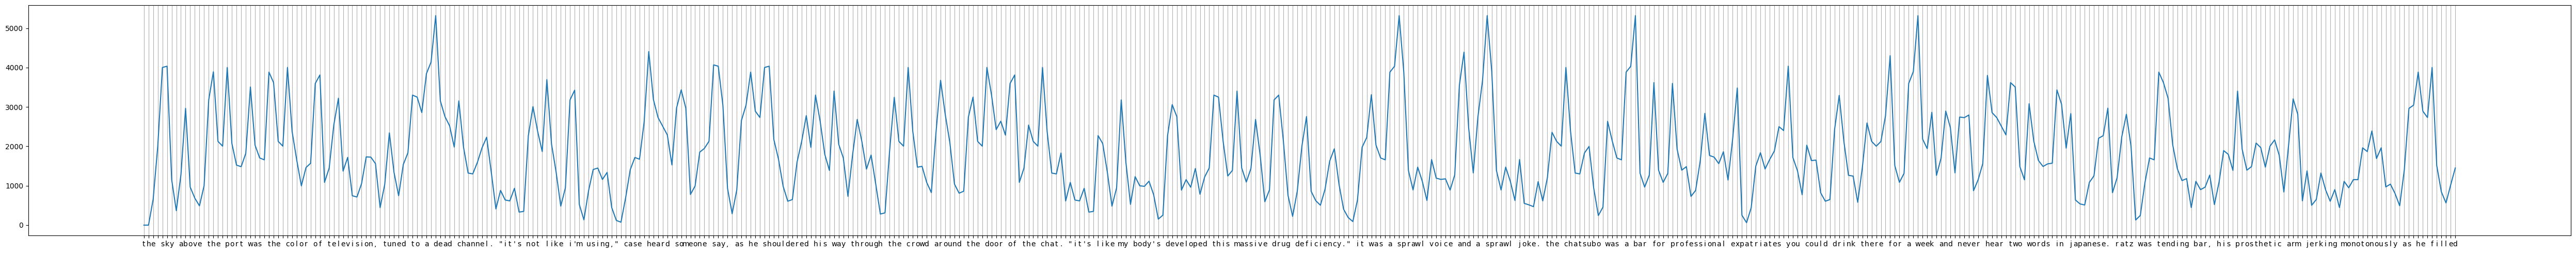

In [270]:
TF = np.array(TF, dtype=float)
# TF = TF - np.pad(TF, (1, 0))[:-1]
# # print(TF)
# TF[np.where(TF > 0)] = 0
# TF = np.abs(TF)
# TF[np.where(TF <= np.mean(TF))] = 0
# # TF[np.where(TF <= 0.5)] = 0
# print(TF.size, TF.max(), TF.min())

KF = np.array(KF)
# KF = KF - np.pad(KF, (0, 1))[1:]
# print(TF)
# KF[np.where(KF < 0)] = 0
# KF = np.abs(KF)
# KF[np.where(KF <= np.mean(KF[np.where(KF > 0)]))] = 0

# # TF /= np.max(TF)
# KF /= np.max(KF)

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
# axs.plot(np.arange(TF.size), TF)
axs.plot(np.arange(KF.size), KF)
axs.xaxis.set_ticks(np.arange(len(input_str)) ,input_str)
axs.xaxis.grid(True)

plt.show()

In [271]:
print(len(input_str), len(KF))
print(peaks)
print(len(peaks), np.sum(KF > 0))
np.where(KF > 0)

500 500
{}
0 498


(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179

In [272]:
sl_input = []
for peak in peaks.values():
    sl_input.append(str(peak))

print(len(sl_input))

0


In [273]:
# second layer predict train

prev_n_L2 = 10

StatsDict_L2 = predict_train(input_str=sl_input, prev_n=prev_n_L2)

for key, val in StatsDict_L2.items():
    print(key, val)

In [274]:
letters_L2 = copy.deepcopy(sl_input)

TF_L2, err_L2, out_L2 = predict(input_str=sl_input, StatsDict=StatsDict_L2, prev_n=prev_n_L2, letters=letters_L2)

print(err_L2, err_L2 / (len(sl_input) / 100) )


ZeroDivisionError: float division by zero

In [ ]:
# probability clusters
for key, val in second_layer_K.items():
    pass

In [ ]:
def downstream_predict(input_str: str | list, 
                       StatsDict_L1: dict, 
                       letters: list,
                       out_L2: list,
                       peaks: dict,
                       second_layer_K: dict[int, dict],
                       prev_n: int, ):
    TF = []
    err = 0

    out_idx = 1

    ds_K = second_layer_K[out_L2[0]]

    for inp_idx, inp in enumerate(input_str):
        if inp_idx == len(input_str) - 1:
            break

        is_peak = peaks.get(inp_idx - 1, -1)
        if is_peak != -1 and out_idx < len(out_L2):
            ds_K = second_layer_K[out_L2[out_idx]]
            out_idx += 1

        stats = []
        # print(f'{ds_K=}')
        # ds_stats = []
        for rev_idx in range(prev_n):
            let_idx = inp_idx - rev_idx
            
            if let_idx < 0:
                break
            # print(inp_idx, let_idx, rev_idx)
            st = copy.deepcopy(StatsDict_L1[input_str[let_idx]].get(rev_idx, {}))
            stats.append(st)

            # ds_st = ds_K[rev_idx]
            # ds_stats.append(ds_st)
        # for st_idx, st in enumerate(stats):
        #     ds_st = ds_K[st_idx]

        #     for key, val in st.items():
        #         if ds_st[key] != -1:
        #             st[key] += ds_st[key]
                # else:
                #     st[key] = 1e-30

        # print(inp)
        for st_idx, st in enumerate(stats):
            st_sum = sum(st.values())

            ds_st = ds_K[st_idx]
            ds_arr = np.array(list(ds_st.values()))
            ds_arr[np.where(ds_arr < 0)] = 0
            ds_sum = np.sum(ds_arr)

            for key, val in st.items():
                st[key] = val / st_sum
                if ds_sum > 0:
                    ds_st[key] = ds_st[key] / ds_sum
                if ds_st[key] < 0:
                    ds_st[key] = -1
                # else:
                #     st[key] = 0
            # print(input_str[inp_idx + 1], max(st, key=st.get), st)
            # print(ds_K[st_idx])
            
        letter_stats = {}
        for letter in letters:
            letter_stats.setdefault(letter, 0)

            for st in stats:
                st_let = st.get(letter, 0)

                if st_let == 0:
                    letter_stats[letter] = 0
                    break

                letter_stats[letter] += st_let
            
            for rank_idx in range(prev_n):
                ds_smbl_prob = ds_K[rank_idx].get(letter, -1)
                if ds_smbl_prob == -1:
                    continue
            
                letter_stats[letter] *= ds_smbl_prob # *=
        # print(f'{letter_stats=}')

        max_key = max(letter_stats, key=letter_stats.get)
        # TF.append(sum(letter_stats.values()))
        # TF.append(letter_stats[max_key])

        ls_arr = np.array(list(letter_stats.values()))
        tf = np.sum(ls_arr > 0)
        
        TF.append(tf)
        
        if inp_idx + 1 < len(input_str):
            print(input_str[inp_idx + 1], max_key, letter_stats[max_key], tf)

            if input_str[inp_idx + 1] != max_key:
                err += 1
        else:
            print('>', max_key, letter_stats[max_key], tf)
        print()

    return TF, err

In [ ]:
ds_TF, ds_err = downstream_predict(input_str=input_str,
                                   StatsDict_L1=StatsDict_L1,
                                   letters=letters,
                                   out_L2=out_L2,
                                   peaks=peaks,
                                   second_layer_K=second_layer_K,
                                   prev_n=prev_n_L1, )


print(ds_err, ds_err / (len(input_str) / 100) )

h   5.666105094169773e+28 12

e   1.1528438936189575e+27 5

    1.0786865248772527e+26 6

s e 117244733212.14497 7

k   3.83492496897876e+18 6

y   7398124463715379.0 2

    202263467557.74106 1

a a 0.9694323121762175 1

b   3249576753.8212633 2

o o 71.20338041001324 1

v   78108960667.58177 2

e e 2.562024074954484 1

    172796.28063565269 1

t t 1.3313172348920288 1

h h 2.0195073732407587 1

e   791.1734727461486 2

    1163.3134813330482 1

p p 1.3513024301463408 1

o o 2.2795705890732783 1

r r 2.154760651933994 1

t t 1.8897492314437088 1

    4.203903631397795 1

w w 1.980098323287047 1

a a 2.8250955025219997 1

s s 2.4645863200499947 1

    4.9171588175501375 1

t t 2.1413177662600416 1

h h 2.184143302177233 1

e e 2.9830207050642303 1

    5.256560406705122 1

c c 1.5845310118882483 1

o   3.5403472887872005 2

l l 1.3835266362491945 1

o o 2.2691619516112818 1

r   3.5063418188839686 2

    4.875326814103286 1

o o 1.7194451203751118 1

f f 1.1929299246149043 1

    4.56